In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
%matplotlib inline

In [3]:
ls

dataCheck.ipynb  list_bbox_consumer2shop.txt  README.md  street2shop/


In [4]:
idPATH = 'street2shop/CLOTHING/Blouse/'

In [5]:
files = sorted([f for f in os.listdir(idPATH)]) #sorted by id
files[:5]

['id_00004848', 'id_00005025', 'id_00005661', 'id_00005855', 'id_00006033']

In [6]:
items = sorted([i for i in os.listdir(idPATH+files[2])])
items

['comsumer_01.jpg', 'shop_01.jpg']

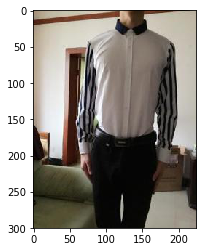

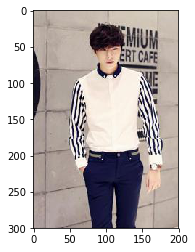

In [7]:
for i in range(len(items)):
    img = np.array(Image.open(idPATH+files[2]+'/'+items[i]))
    plt.imshow(img)
    plt.show()

## bounding boxの読み込み
ファイル読み込みの際に改行コードを削除する必要がある。

In [8]:
with open('list_bbox_consumer2shop.txt','r') as f:
    texts = f.readlines()
    for i,text in enumerate(texts):
        texts[i] = text.strip()

In [11]:
texts[1:10]

['image_name clothes_type source_type x_1 y_1 x_2 y_2',
 'img/CLOTHING/Polo_Shirt/id_00006282/shop_01.jpg              1 1 001 039 200 292',
 'img/CLOTHING/Polo_Shirt/id_00006282/comsumer_01.jpg          1 2 001 001 223 300',
 'img/CLOTHING/Polo_Shirt/id_00006282/comsumer_02.jpg          1 2 001 001 169 230',
 'img/CLOTHING/Polo_Shirt/id_00006282/comsumer_03.jpg          1 2 006 008 215 300',
 'img/CLOTHING/Polo_Shirt/id_00006282/comsumer_04.jpg          1 2 001 001 225 300',
 'img/CLOTHING/Polo_Shirt/id_00006695/comsumer_01.jpg          1 2 037 066 164 211',
 'img/CLOTHING/Polo_Shirt/id_00006695/comsumer_02.jpg          1 2 064 056 158 181',
 'img/CLOTHING/Polo_Shirt/id_00006695/shop_01.jpg              1 1 010 060 178 259']

### カラムの意味
- image_name： ファイル名
- clothes_type: 服のカテゴリ
- source_type: 1 = ショップ画像, 2 = 顧客画像
- x_1 y_1 x_2 y_2: bboxの角4つ

In [39]:
# extract strings example
item_num = 102
example = [x for x in texts[item_num].split(' ') if len(x) > 0]
example

['img/CLOTHING/Polo_Shirt/id_00010222/shop_01.jpg',
 '1',
 '1',
 '010',
 '001',
 '197',
 '235']

In [40]:
x1,y1,x2,y2=int(example[3]),int(example[4]),int(example[5]),int(example[6])

In [41]:
img_path = example[0]

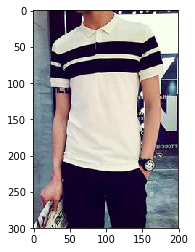

In [42]:
img = np.array(Image.open(img_path))
plt.imshow(img)
plt.show()

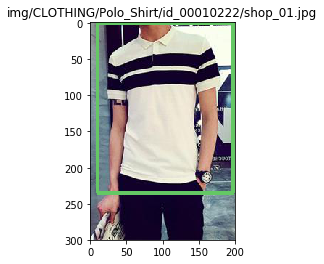

In [46]:
imgcv2 = cv2.rectangle(img, (x1,y1), (x2,y2),(100,200,100),3)
plt.imshow(imgcv2)
plt.title(img_path)
plt.show()